In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import top_k_accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import random
from scipy import stats
#import statsmodels.api as sm

from itertools import cycle
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif


In [ ]:
list999 = []
list88 = []
elselist = []
column_feature = []
BMI_grade = []
accuracy = [] 
count0 = [] 
count1 = []
print_list = []
ct = 0
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)


# # 혈액검사 변수
# column_name_gb = ['HE_BMI']
# column_name_choice1 = ['HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uacid', 'HE_glu', 'HE_sbp', 'HE_dbp', 'HE_HbA1c', 'BE3_76', 'BE3_86', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_HB']
# column_name_6079 = ['HE_glu', 'HE_HbA1c', 'HE_alt', 'HE_TG', 'HE_RBC', 'HE_Uacid', 'HE_HB', 'HE_WBC', 'BE3_86', 'HE_ast']
# column_name_1939 = ['HE_alt', 'HE_Uacid', 'HE_sbp', 'HE_glu', 'HE_TG', 'HE_HbA1c', 'HE_dbp', 'BE3_76', 'HE_WBC', 'HE_Bplt']
# column_name_4059 = ['HE_TG', 'HE_alt', 'HE_glu', 'HE_Uacid', 'HE_HbA1c', 'HE_dbp', 'HE_sbp', 'HE_RBC', 'HE_WBC', 'HE_HB']
# ######## 
# column_name_group = ['HE_BMI'] + column_name_choice1

# # for c_name in column_name_gb + column_name_choice1 + column_name_6079 + column_name_1939 + column_name_4059:
# #        if c_name not in column_name_group:
# #          column_name_group.append(c_name)

# # 아래에서 BMI를 기준으로 정렬하고, BMI를 제거하기 때문에 각 그룹별로 보기 위해서는 + ['HE_BMI'] 부분이 들어가야함.
# column_feature = [column_name_gb + column_name_choice1,
#                   column_name_gb + column_name_6079,
#                   column_name_gb + column_name_1939,
#                   column_name_gb + column_name_4059]

# print_name = ['choice1', 5979, 1939, 3959]
# cl = len(column_feature)

Binary

In [ ]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
sup = "_SMOTE"
PATH = "Binary_SGD_Result" + sup
import os
os.makedirs(PATH,exist_ok=True)

for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Binary_OverSampling.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)

            BMI_tmp = df['HE_BMI']
            for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(1)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]

                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

                train_ = pd.concat([X_train, y_train], axis=1)
                # print(train_)
                
                cnt_list = train_['BMI_grade'].squeeze()
                cnt_list = cnt_list.tolist()
                # cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                print(cnt0)
                print(cnt1)
                # tree_data_1 = y_train.copy()
                # print(tree_data_1)

                iteration_test[iter].append([cnt0, cnt1])
                
                # cnt_min = min(cnt0, cnt1, cnt2)
                # cnt_max = max(cnt0, cnt1, cnt2)
                
                # if cnt1 * cnt0 != 0:
                #     if cnt1/cnt0 > 1.2:
                #         cnt_select = cnt1-cnt0 # 얼마나 차이가 나는지
                #         print(cnt_select)
                #         local = train_.loc[(train_['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                #         idx = local.index.values # 추출한 것의 index
                #         select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                #         tree_data_2 = train_.loc[select_list]
                #         # print(' 0만 추출된 data')
                #         # print(tree_data_2)
                #         tree_data = pd.concat([train_,tree_data_2], ignore_index=True)
                #         # print(tree_data)
                        
                #         X_train = tree_data.iloc[:,:-1]
                #         y_train = tree_data.iloc[:,-1:]

                #     elif cnt0/cnt1 > 1.2:
                #         cnt_select = cnt0-cnt1
                #         print(cnt_select)
                #         local = train_.loc[(train_['BMI_grade']==1)]
                #         idx = local.index.values
                #         select_list = [random.choice(idx) for i in range(cnt_select)]
                #         tree_data_2 = train_.loc[select_list]
                #         # print(' 1만 추출된 data')
                #         # print(tree_data_2)
                #         tree_data = pd.concat([train_,tree_data_2], ignore_index=True)
                #         # print(tree_data)

                #         X_train = tree_data.iloc[:,:-1]
                #         y_train = tree_data.iloc[:,-1:]
                    
                    
                ###############
                ### SMOTE #####
                ###############
                sm = SMOTE(random_state=12)#, ratio = 1.0)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                    #######################
                    # cnt_list = tree_data['BMI_grade'].tolist()
                    # cnt1 = cnt_list.count(1)
                    # cnt0 = cnt_list.count(0)
                    ########################

                    # cnt_list = y_train['BMI_grade'].squeeze()
                    # cnt_list = cnt_list.tolist()
                    # # cnt2 = cnt_list.count(2)
                    # cnt1 = cnt_list.count(1)
                    # cnt0 = cnt_list.count(0)
                    # print(cnt0)
                    # print(cnt1)
                    
                train_data_size = len(y_train)
                test_data_size = len(y_test)
                    
                ##########################################################
                    
                    
                clf = SGDClassifier(max_iter=1000)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred)
                p_score = precision_score(y_test, y_pred)
                f_score = f1_score(y_test, y_pred)
                accuracy = clf.score(X_test,y_test)
                TP = perf_measure(np.array(y_test), y_pred)[0]
                FP = perf_measure(np.array(y_test), y_pred)[1]
                TN = perf_measure(np.array(y_test), y_pred)[2]
                FN = perf_measure(np.array(y_test), y_pred)[3]
                #print(str(ii) + ' ' + str(age_list[age]) + ' ' + str(i+1) + 'th group')
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                # print_list[ct].append(str(print_name[i]) + "th_group")
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                
                print_list[ct].append(str(train_data_size))
                print_list[ct].append(str(test_data_size))
                
                print_list[ct].append(TP)
                print_list[ct].append(FP)
                print_list[ct].append(TN)
                print_list[ct].append(FN)
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                
                fpr,tpr, threshold = roc_curve(y_test,clf.decision_function(X_test))
                plt.figure()
                plt.plot(fpr,tpr,label = "roc curve")
                plt.xlabel("FPR")
                plt.ylabel("TPR")

                plt.legend(loc = 4)
                plt.fill_between(fpr,tpr, alpha=0.5)
                clf_auc = roc_auc_score(y_test, clf.decision_function(X_test))
                plt.text(0.65,0.2,"AUC score: {:.3f}".format(clf_auc))
                plt.title('top ' + str(top_count) + ' ' + str(ii) + ' ' + str(age_list[age]) + ' LR')
                plt.savefig(PATH + '/top ' + str(top_count) + ' ' + str(ii) + ' ' + str(age_list[age]) + ' LR.png')
                plt.close()
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel())
                conf_mx = confusion_matrix(y_train.values.ravel(), y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                ct += 1
                
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
            
            iter += 1
        
        
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Train_data_size',
                                'Test_data_size',
                                'TP',
                                'FP',
                                'TN',
                                'FN',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' SGD_혈액검사 데이터' + sup + '.csv', index=False)

MULTICLASS

In [ ]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
sup = "_micro_SMOTE"
PATH = "Multiclass_SGD_Result" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)

            BMI_tmp = df['HE_BMI']
            for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]

                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                n_classes = 3 #고정
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # cnt_dict = dict(Counter(y_train['BMI_grade']))
                # cnt0 = cnt_dict[0]
                # cnt1 = cnt_dict[1]
                # cnt2 = cnt_dict[2]
                # print(cnt0, cnt1, cnt2)

                # #######################
                # ###### MANUALLY #######
                # #######################
                                
                # cnt_max = max(cnt0,cnt1,cnt2)
                # train_ = pd.concat([X_train, y_train], axis=1)
                
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['BMI_grade']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['BMI_grade']==2)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-1]
                # y_train = train_.iloc[:,-1:]

                ###############
                ### SMOTE #####
                ###############
                sm = SMOTE(random_state=12)#, ratio = 1.0)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                # print('after augmentation')
                # print(cnt0, cnt1, cnt2)
                # print('------------------')
                
                
                cnt_dict = dict(Counter(y_train['BMI_grade']))
                cnt0 = cnt_dict[0]
                cnt1 = cnt_dict[1]
                cnt2 = cnt_dict[2]
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')                    
                ##########################################################
                # from sklearn.multiclass import OneVsRestClassifier
                from sklearn.multiclass import OneVsOneClassifier
                # clf = OneVsRestClassifier(SGDClassifier())
                clf = OneVsOneClassifier(SGDClassifier())
                parameters = { "estimator__penalty" : ["l2", "l1"],
                              "estimator__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
                ##################GRID SEARCH CV
                # parameters = {'gamma':[0.01, 0.1,0.5,1,5,10,30,50],
                #             'C':[0.01, 0.1,0.5,1,5,10,30,50]}
                grid_dtree = GridSearchCV(clf,param_grid=parameters,cv=3,refit=True)
                grid_dtree.fit(X_train,y_train)

                print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
                print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

                fig = plt.figure(2*i)
                best_param = list(grid_dtree.best_params_.values())

                # clf = OneVsRestClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
                clf = OneVsOneClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
            
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'micro')
                p_score = precision_score(y_test, y_pred, average = 'micro')
                f_score = f1_score(y_test, y_pred, average = 'micro')
                accuracy = clf.score(X_test,y_test)#, average = None)
                # TP = perf_measure(np.array(y_test), y_pred)[0]
                # FP = perf_measure(np.array(y_test), y_pred)[1]
                # TN = perf_measure(np.array(y_test), y_pred)[2]
                # FN = perf_measure(np.array(y_test), y_pred)[3]
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                y_test = label_binarize(y_test, classes=[0, 1, 2]) # SVC input이 one hot incoding으로 안들어감.
                
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.decision_function(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.decision_function(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                lw = 2
                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE' + sup + '.png')
                plt.show()
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel())
                conf_mx = confusion_matrix(y_train.values.ravel(), y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                # y_prob = clf.predict_proba(X_test).ravel()/
                y_prob = clf.decision_function(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' SGD_혈액검사 데이터' + sup + '.csv', index=False)

MULTICLASS age 194979

after augmentation
1584 1584 1584
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5021


<Figure size 432x288 with 0 Axes>

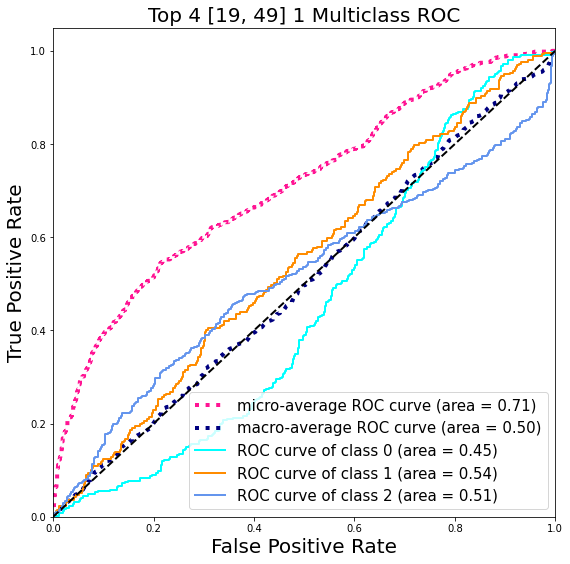

One-vs-One ROC AUC scores:
0.709065 (macro),
0.709065 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.709065 (macro),
0.709065 (weighted by prevalence)
after augmentation
1529 1529 1529
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4192


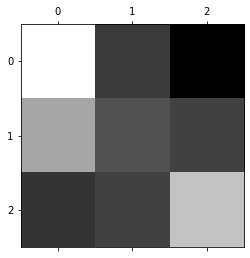

<Figure size 432x288 with 0 Axes>

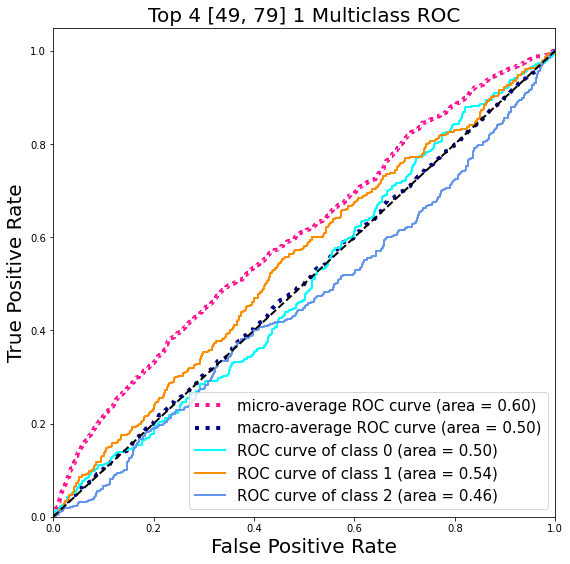

One-vs-One ROC AUC scores:
0.600915 (macro),
0.600915 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.600915 (macro),
0.600915 (weighted by prevalence)
after augmentation
2197 2197 2197
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5048


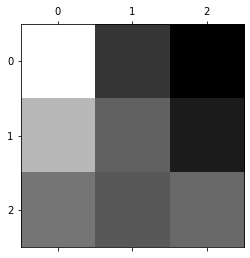

<Figure size 432x288 with 0 Axes>

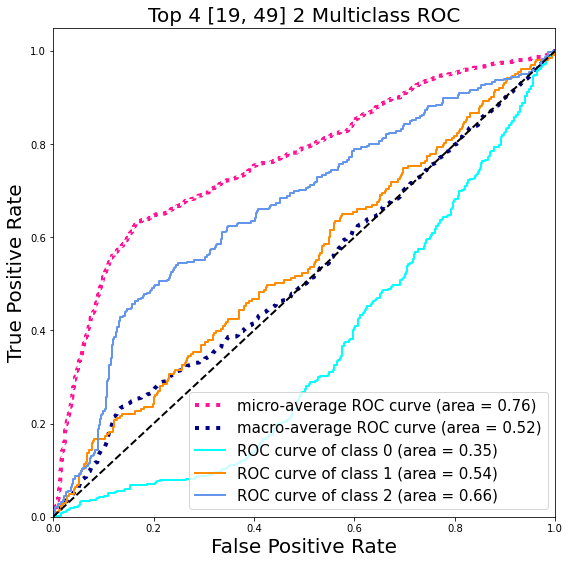

One-vs-One ROC AUC scores:
0.763169 (macro),
0.763169 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.763169 (macro),
0.763169 (weighted by prevalence)
after augmentation
1902 1902 1902
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4364


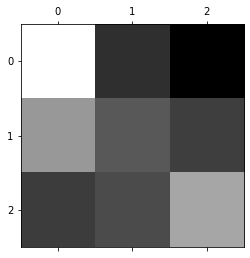

<Figure size 432x288 with 0 Axes>

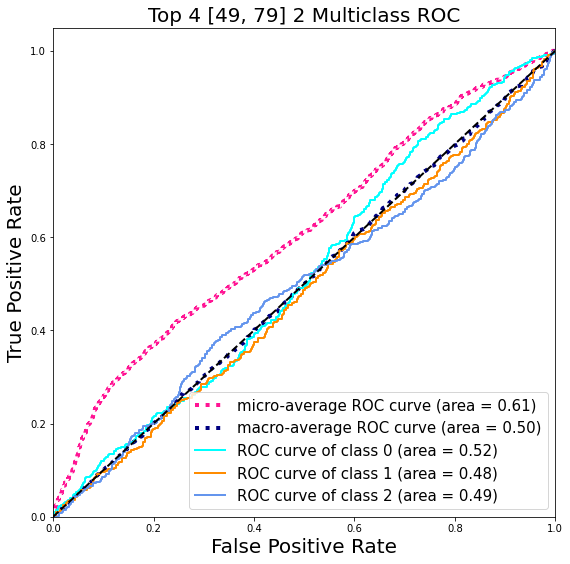

One-vs-One ROC AUC scores:
0.608242 (macro),
0.608242 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.608242 (macro),
0.608242 (weighted by prevalence)
after augmentation
1552 1552 1552
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5054


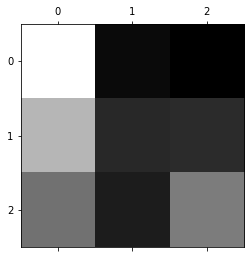

<Figure size 432x288 with 0 Axes>

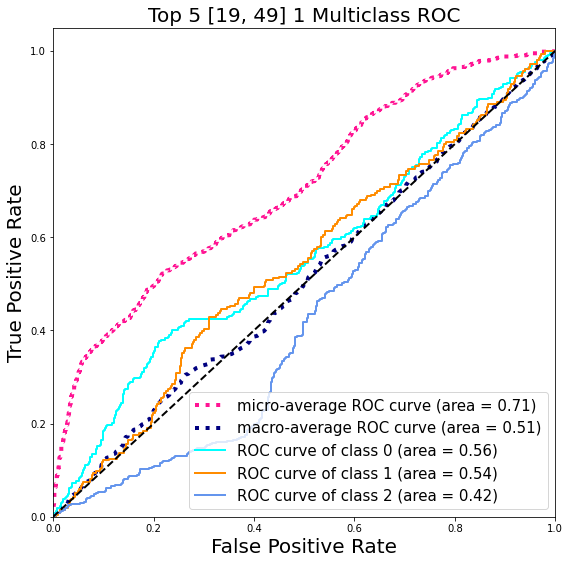

One-vs-One ROC AUC scores:
0.705190 (macro),
0.705190 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.705190 (macro),
0.705190 (weighted by prevalence)
after augmentation
1529 1529 1529
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4166


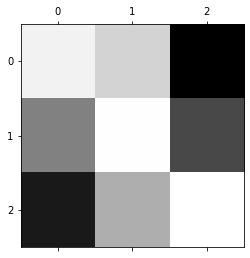

<Figure size 432x288 with 0 Axes>

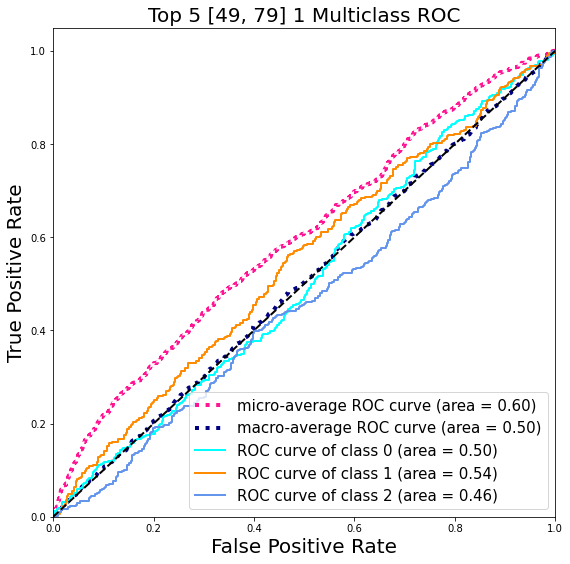

One-vs-One ROC AUC scores:
0.597247 (macro),
0.597247 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.597247 (macro),
0.597247 (weighted by prevalence)
after augmentation
2192 2192 2192
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5134


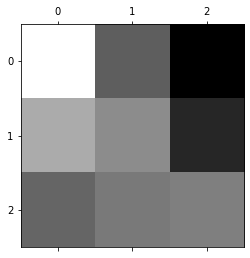

<Figure size 432x288 with 0 Axes>

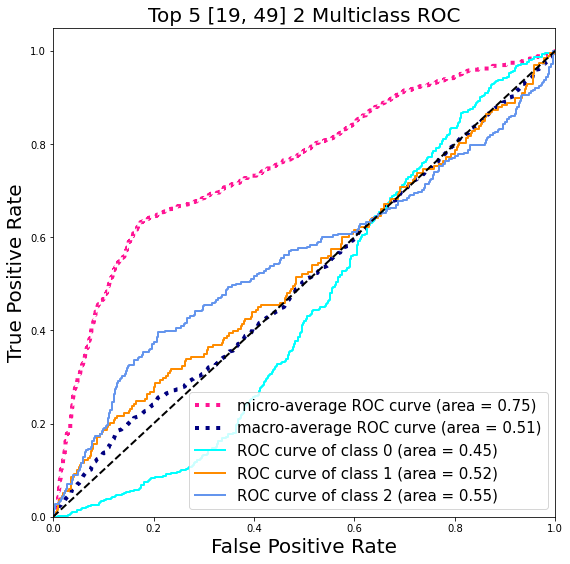

One-vs-One ROC AUC scores:
0.754553 (macro),
0.754553 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.754553 (macro),
0.754553 (weighted by prevalence)
after augmentation
1894 1894 1894
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4370


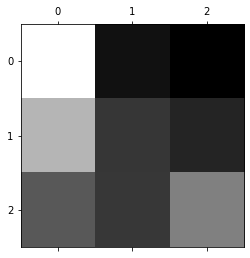

<Figure size 432x288 with 0 Axes>

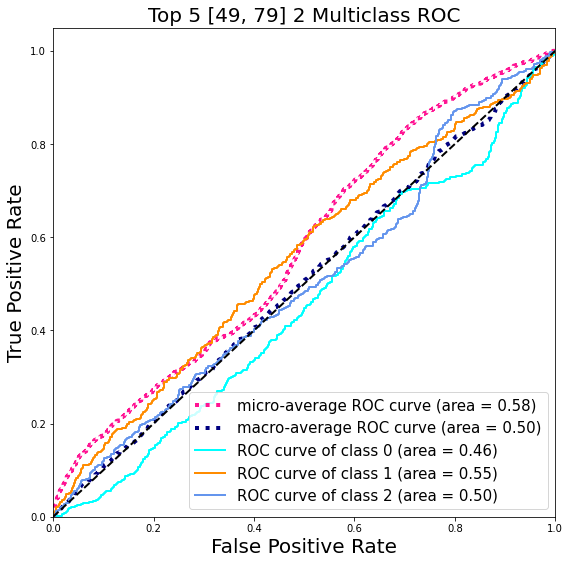

One-vs-One ROC AUC scores:
0.575907 (macro),
0.575907 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.575907 (macro),
0.575907 (weighted by prevalence)
after augmentation
1529 1529 1529
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5014


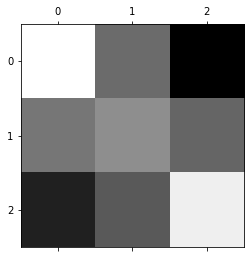

<Figure size 432x288 with 0 Axes>

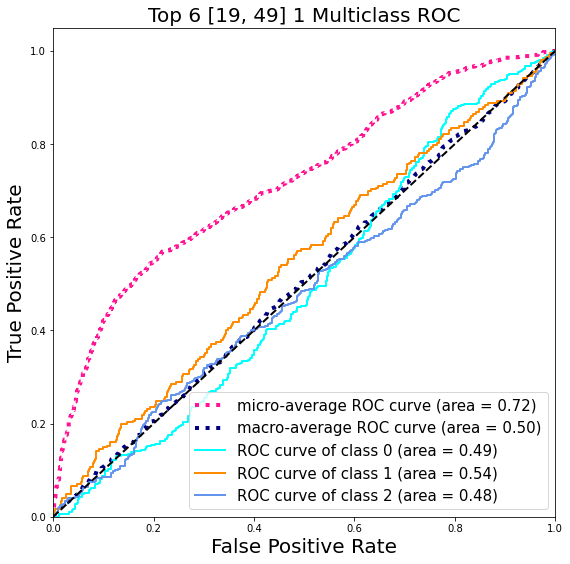

One-vs-One ROC AUC scores:
0.719487 (macro),
0.719487 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.719487 (macro),
0.719487 (weighted by prevalence)
after augmentation
1520 1520 1520
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4325


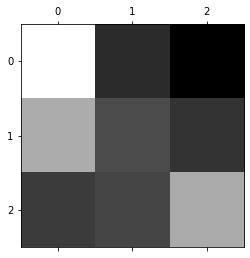

<Figure size 432x288 with 0 Axes>

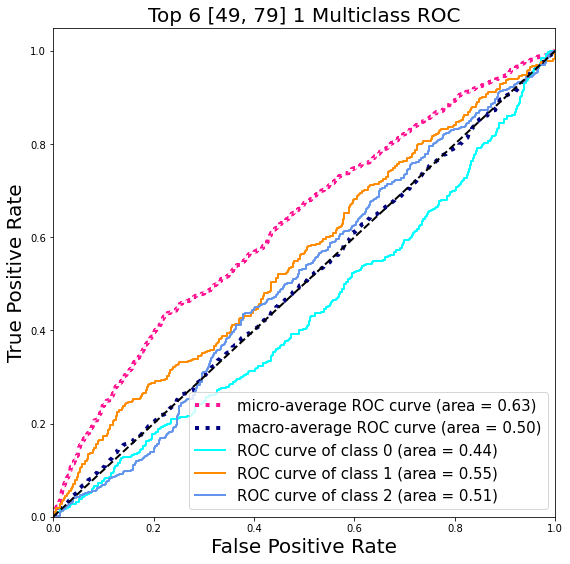

One-vs-One ROC AUC scores:
0.628380 (macro),
0.628380 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.628380 (macro),
0.628380 (weighted by prevalence)
after augmentation
2183 2183 2183
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5097


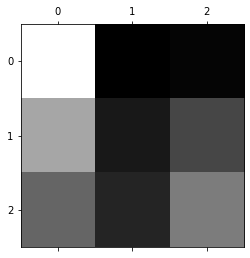

<Figure size 432x288 with 0 Axes>

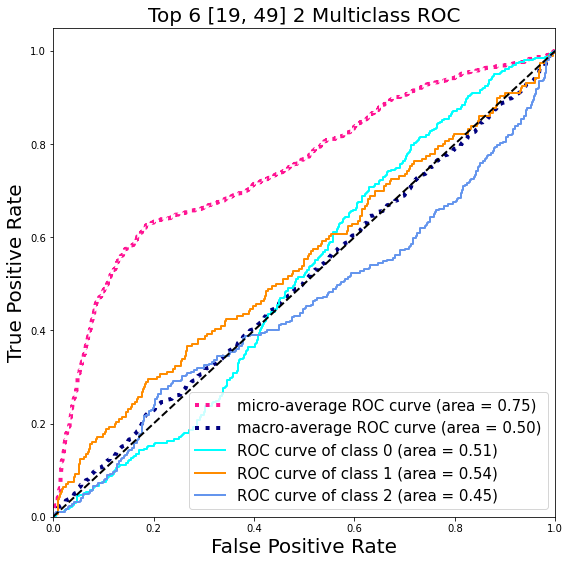

One-vs-One ROC AUC scores:
0.747023 (macro),
0.747023 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.747023 (macro),
0.747023 (weighted by prevalence)
after augmentation
1887 1887 1887
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4377


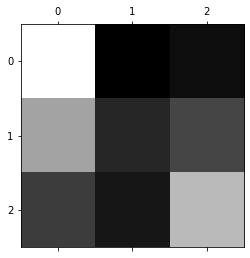

<Figure size 432x288 with 0 Axes>

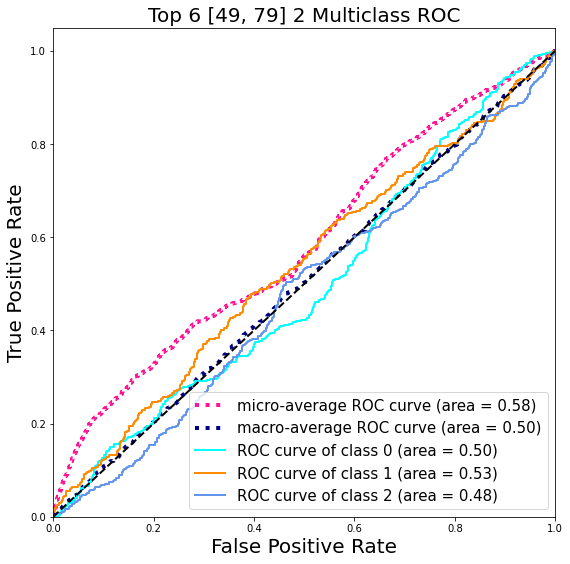

One-vs-One ROC AUC scores:
0.583538 (macro),
0.583538 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.583538 (macro),
0.583538 (weighted by prevalence)
after augmentation
1548 1548 1548
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5084


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


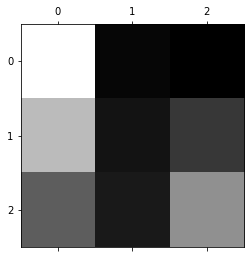

<Figure size 432x288 with 0 Axes>

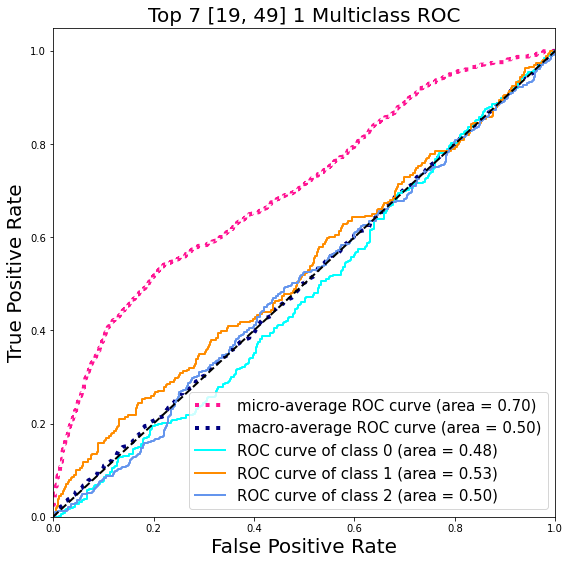

One-vs-One ROC AUC scores:
0.702063 (macro),
0.702063 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.702063 (macro),
0.702063 (weighted by prevalence)
after augmentation
1520 1520 1520
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4406


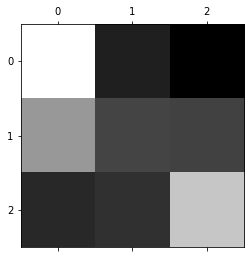

<Figure size 432x288 with 0 Axes>

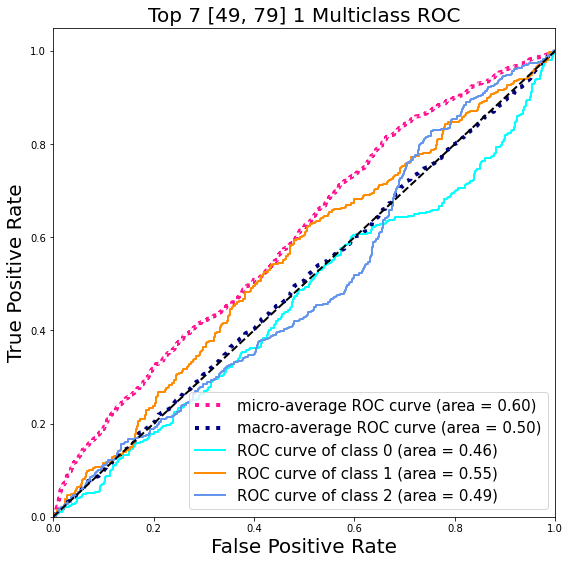

One-vs-One ROC AUC scores:
0.601315 (macro),
0.601315 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.601315 (macro),
0.601315 (weighted by prevalence)
after augmentation
2188 2188 2188
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5259


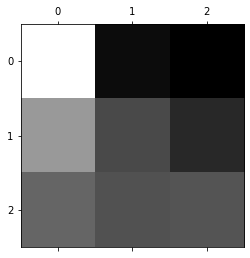

<Figure size 432x288 with 0 Axes>

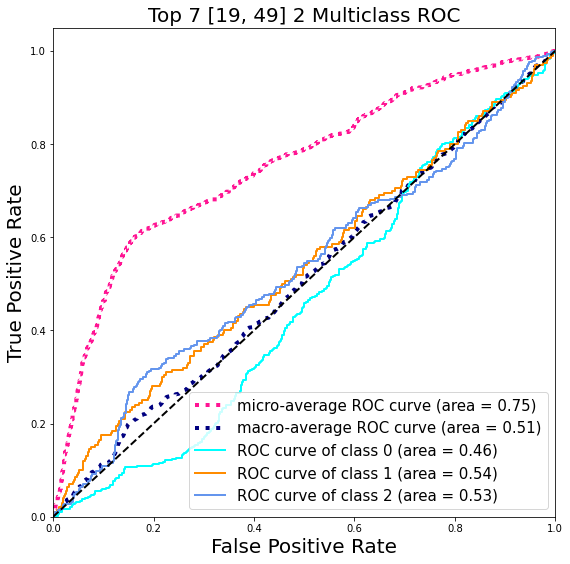

One-vs-One ROC AUC scores:
0.750972 (macro),
0.750972 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.750972 (macro),
0.750972 (weighted by prevalence)
after augmentation
1891 1891 1891
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4430


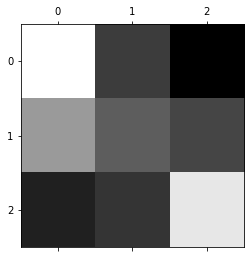

<Figure size 432x288 with 0 Axes>

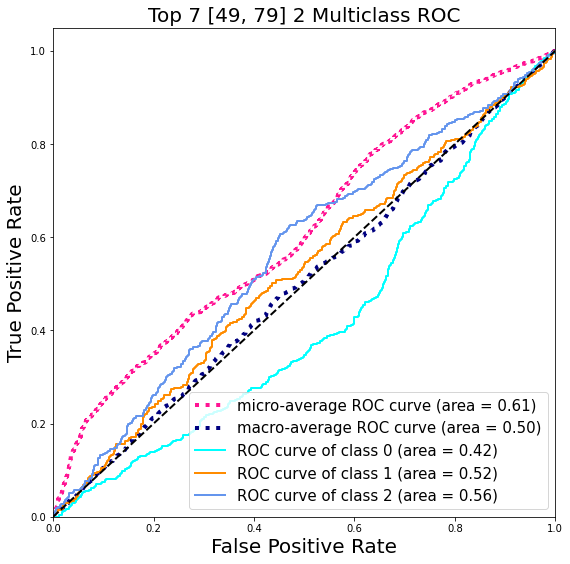

One-vs-One ROC AUC scores:
0.611132 (macro),
0.611132 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.611132 (macro),
0.611132 (weighted by prevalence)
after augmentation
1548 1548 1548
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5095


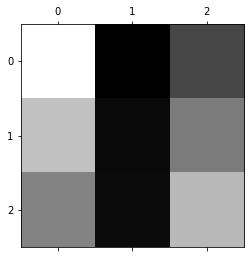

<Figure size 432x288 with 0 Axes>

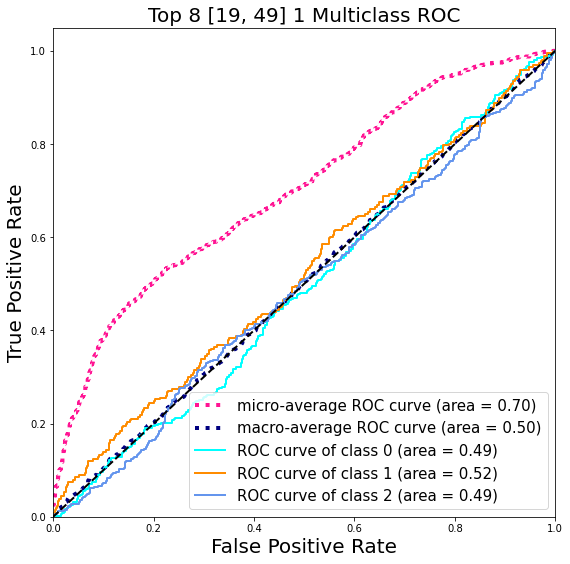

One-vs-One ROC AUC scores:
0.699200 (macro),
0.699200 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.699200 (macro),
0.699200 (weighted by prevalence)
after augmentation
1503 1503 1503
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4489


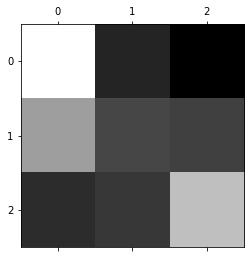

<Figure size 432x288 with 0 Axes>

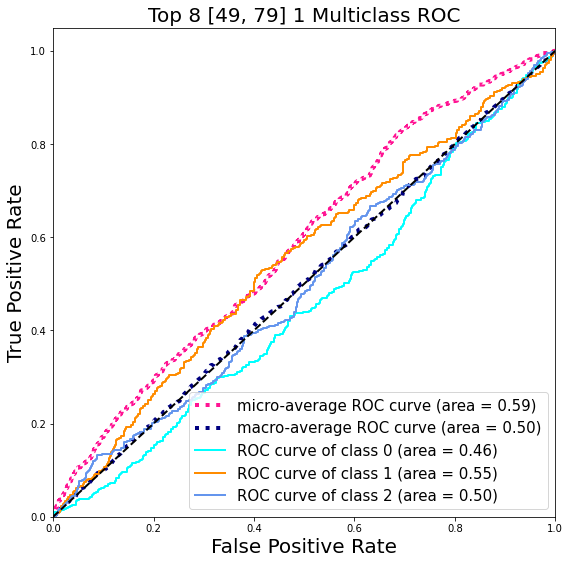

One-vs-One ROC AUC scores:
0.586179 (macro),
0.586179 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.586179 (macro),
0.586179 (weighted by prevalence)
after augmentation
2188 2188 2188
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.5232


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


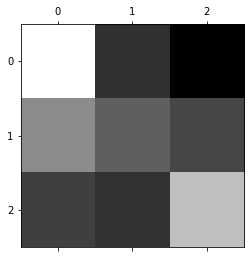

<Figure size 432x288 with 0 Axes>

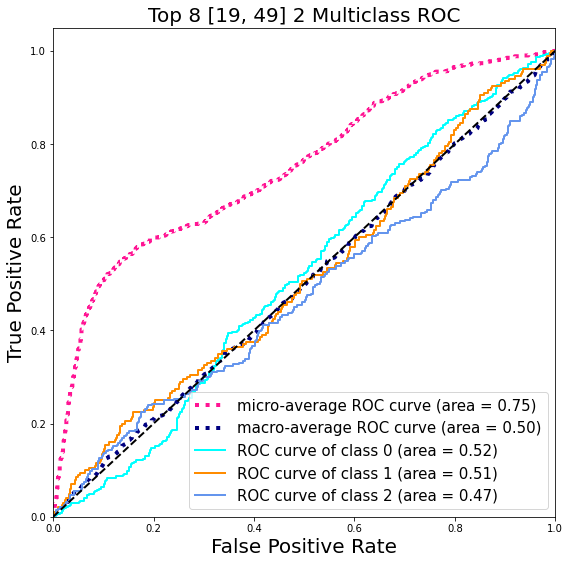

One-vs-One ROC AUC scores:
0.748986 (macro),
0.748986 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.748986 (macro),
0.748986 (weighted by prevalence)
after augmentation
1891 1891 1891
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4391


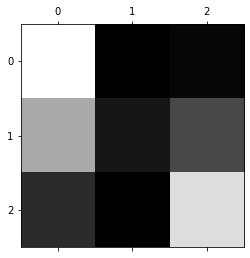

<Figure size 432x288 with 0 Axes>

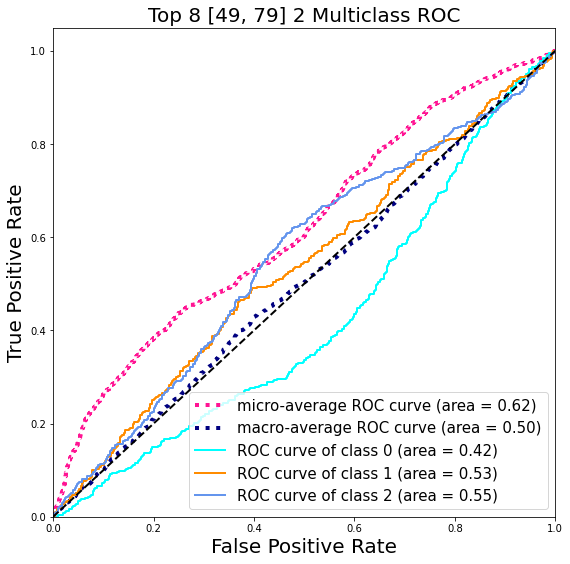

One-vs-One ROC AUC scores:
0.619536 (macro),
0.619536 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.619536 (macro),
0.619536 (weighted by prevalence)


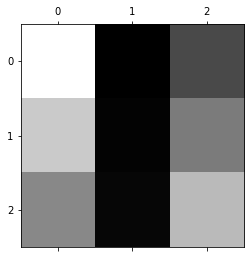

In [6]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
sup = "_micro_SMOTE"
PATH = "Multiclass_SGD_Result_194979" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 49], [49, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling_194979.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)

            BMI_tmp = df['HE_BMI']
            for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]

                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                n_classes = 3 #고정
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # cnt_dict = dict(Counter(y_train['BMI_grade']))
                # cnt0 = cnt_dict[0]
                # cnt1 = cnt_dict[1]
                # cnt2 = cnt_dict[2]
                # print(cnt0, cnt1, cnt2)

                # #######################
                # ###### MANUALLY #######
                # #######################
                                
                # cnt_max = max(cnt0,cnt1,cnt2)
                # train_ = pd.concat([X_train, y_train], axis=1)
                
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['BMI_grade']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['BMI_grade']==2)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-1]
                # y_train = train_.iloc[:,-1:]

                ###############
                ### SMOTE #####
                ###############
                sm = SMOTE(random_state=12)#, ratio = 1.0)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                # print('after augmentation')
                # print(cnt0, cnt1, cnt2)
                # print('------------------')
                
                
                cnt_dict = dict(Counter(y_train['BMI_grade']))
                cnt0 = cnt_dict[0]
                cnt1 = cnt_dict[1]
                cnt2 = cnt_dict[2]
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')                    
                ##########################################################
                # from sklearn.multiclass import OneVsRestClassifier
                from sklearn.multiclass import OneVsOneClassifier
                # clf = OneVsRestClassifier(SGDClassifier())
                clf = OneVsOneClassifier(SGDClassifier())
                parameters = { "estimator__penalty" : ["l2", "l1"],
                              "estimator__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
                ##################GRID SEARCH CV
                # parameters = {'gamma':[0.01, 0.1,0.5,1,5,10,30,50],
                #             'C':[0.01, 0.1,0.5,1,5,10,30,50]}
                grid_dtree = GridSearchCV(clf,param_grid=parameters,cv=3,refit=True)
                grid_dtree.fit(X_train,y_train)

                print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
                print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

                fig = plt.figure(2*i)
                best_param = list(grid_dtree.best_params_.values())

                # clf = OneVsRestClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
                clf = OneVsOneClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
            
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'micro')
                p_score = precision_score(y_test, y_pred, average = 'micro')
                f_score = f1_score(y_test, y_pred, average = 'micro')
                accuracy = clf.score(X_test,y_test)#, average = None)
                # TP = perf_measure(np.array(y_test), y_pred)[0]
                # FP = perf_measure(np.array(y_test), y_pred)[1]
                # TN = perf_measure(np.array(y_test), y_pred)[2]
                # FN = perf_measure(np.array(y_test), y_pred)[3]
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                y_test = label_binarize(y_test, classes=[0, 1, 2]) # SVC input이 one hot incoding으로 안들어감.
                
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.decision_function(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.decision_function(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                lw = 2
                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE' + sup + '.png')
                plt.show()
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel())
                conf_mx = confusion_matrix(y_train.values.ravel(), y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                # y_prob = clf.predict_proba(X_test).ravel()/
                y_prob = clf.decision_function(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' SGD_혈액검사 데이터' + sup + '.csv', index=False)

Multiclss nogender

after augmentation
2024 2024 2024
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5344


<Figure size 432x288 with 0 Axes>

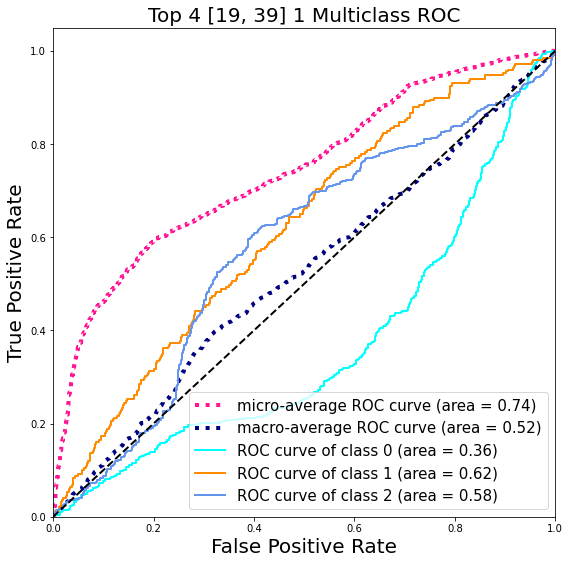

One-vs-One ROC AUC scores:
0.741767 (macro),
0.741767 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.741767 (macro),
0.741767 (weighted by prevalence)
after augmentation
2551 2551 2551
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4860


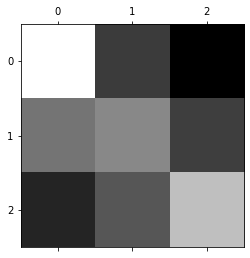

<Figure size 432x288 with 0 Axes>

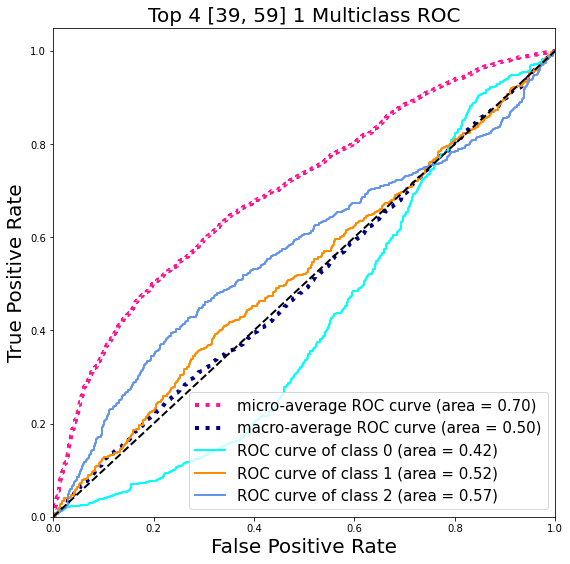

One-vs-One ROC AUC scores:
0.700846 (macro),
0.700846 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.700846 (macro),
0.700846 (weighted by prevalence)
after augmentation
2106 2106 2106
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.3992


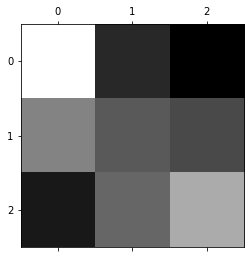

<Figure size 432x288 with 0 Axes>

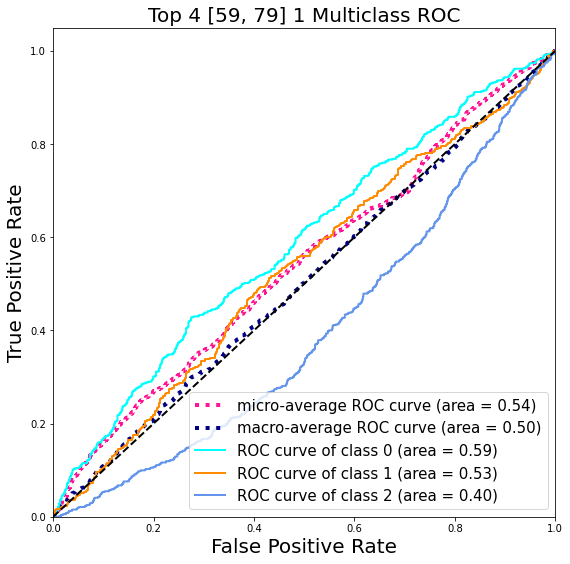

One-vs-One ROC AUC scores:
0.542112 (macro),
0.542112 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.542112 (macro),
0.542112 (weighted by prevalence)
after augmentation
2012 2012 2012
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5355


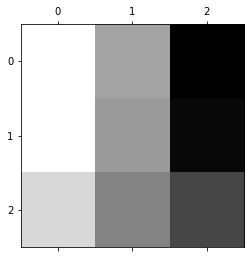

<Figure size 432x288 with 0 Axes>

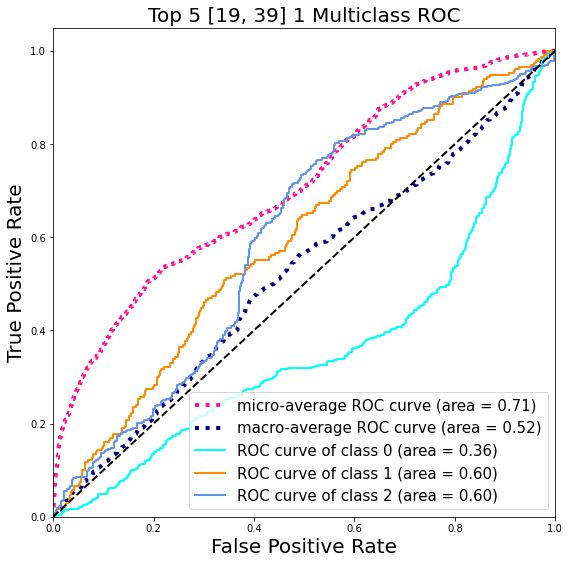

One-vs-One ROC AUC scores:
0.706322 (macro),
0.706322 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.706322 (macro),
0.706322 (weighted by prevalence)
after augmentation
2529 2529 2529
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4931


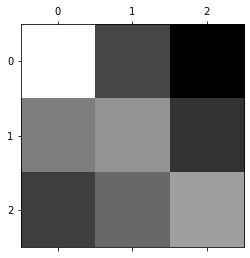

<Figure size 432x288 with 0 Axes>

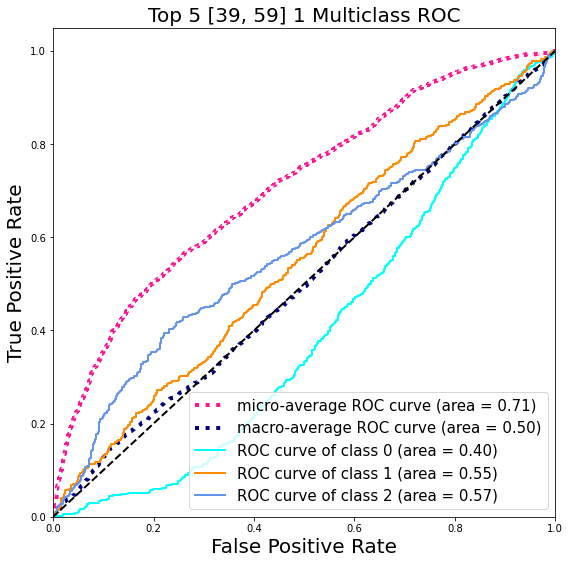

One-vs-One ROC AUC scores:
0.708240 (macro),
0.708240 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.708240 (macro),
0.708240 (weighted by prevalence)
after augmentation
2087 2087 2087
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4178


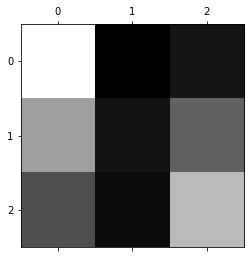

<Figure size 432x288 with 0 Axes>

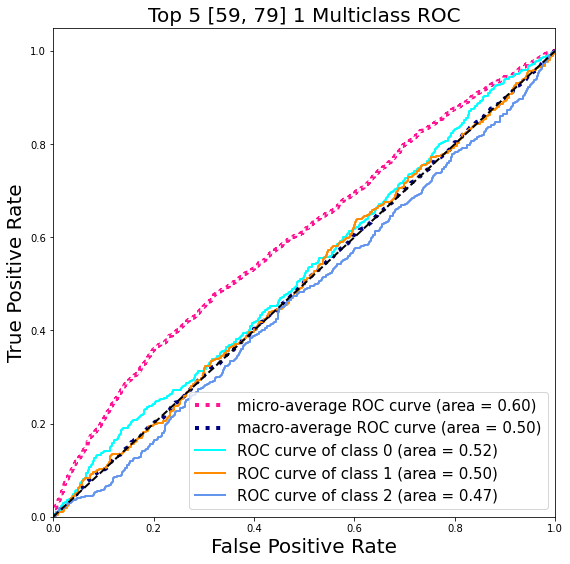

One-vs-One ROC AUC scores:
0.599692 (macro),
0.599692 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.599692 (macro),
0.599692 (weighted by prevalence)
after augmentation
2018 2018 2018
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5373


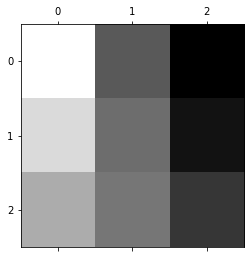

<Figure size 432x288 with 0 Axes>

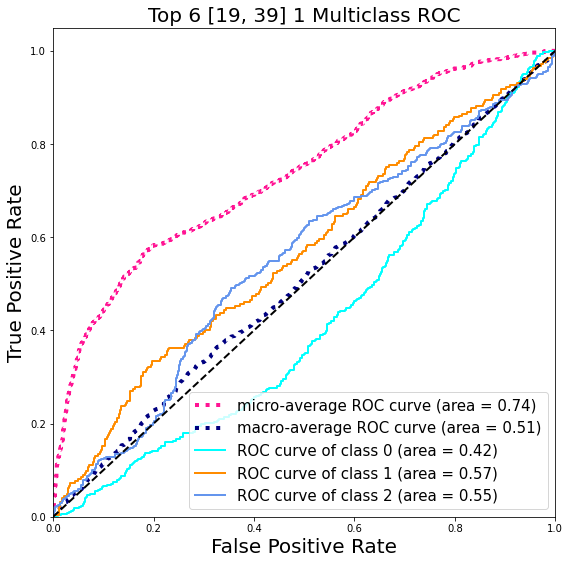

One-vs-One ROC AUC scores:
0.738482 (macro),
0.738482 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.738482 (macro),
0.738482 (weighted by prevalence)
after augmentation
2528 2528 2528
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4858


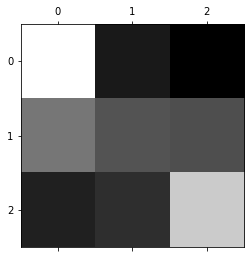

<Figure size 432x288 with 0 Axes>

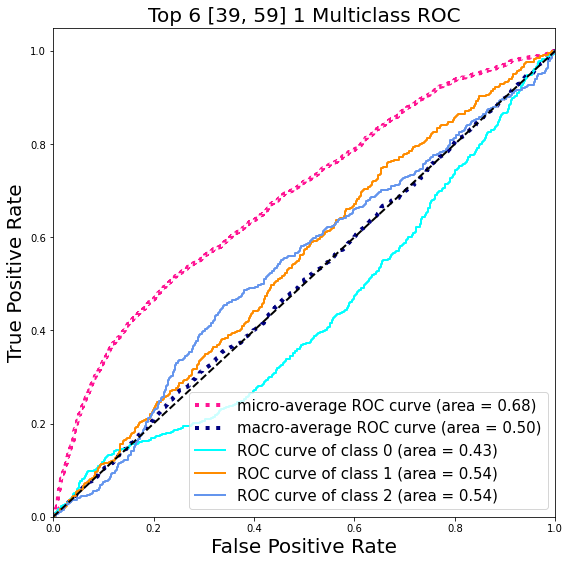

One-vs-One ROC AUC scores:
0.682608 (macro),
0.682608 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.682608 (macro),
0.682608 (weighted by prevalence)
after augmentation
2087 2087 2087
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4306


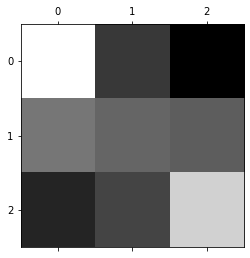

<Figure size 432x288 with 0 Axes>

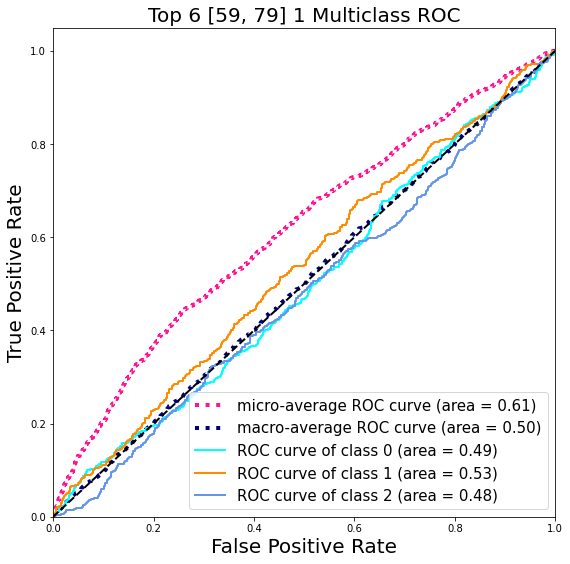

One-vs-One ROC AUC scores:
0.613703 (macro),
0.613703 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.613703 (macro),
0.613703 (weighted by prevalence)
after augmentation
2018 2018 2018
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5362


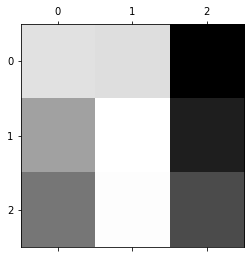

<Figure size 432x288 with 0 Axes>

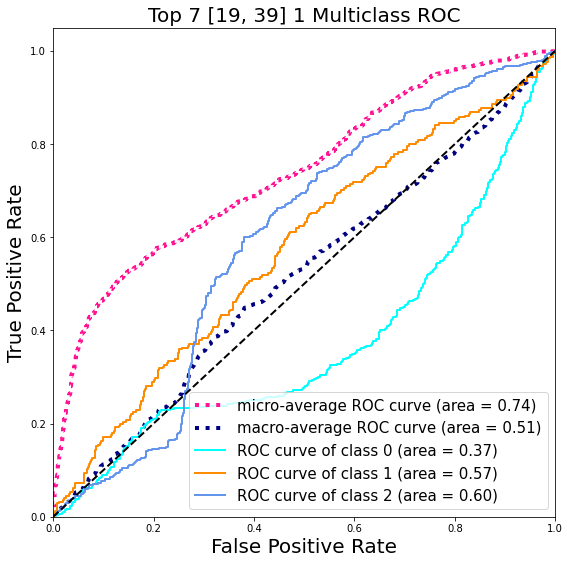

One-vs-One ROC AUC scores:
0.737280 (macro),
0.737280 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.737280 (macro),
0.737280 (weighted by prevalence)
after augmentation
2528 2528 2528
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4839


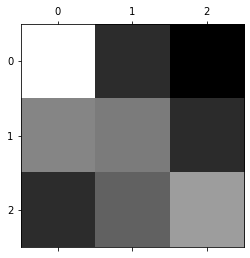

<Figure size 432x288 with 0 Axes>

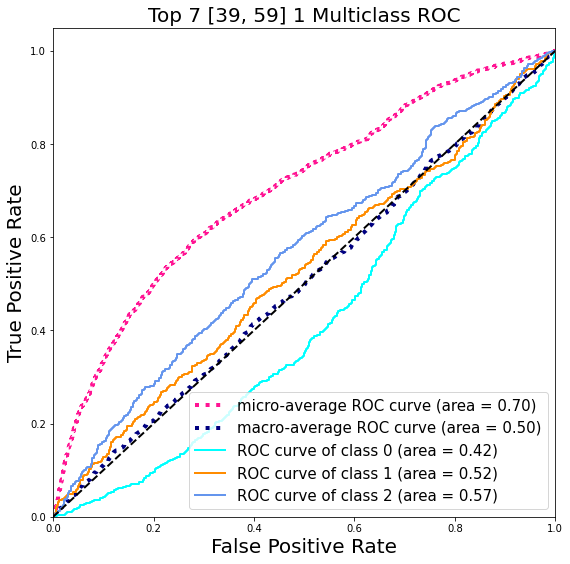

One-vs-One ROC AUC scores:
0.699879 (macro),
0.699879 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.699879 (macro),
0.699879 (weighted by prevalence)
after augmentation
2092 2092 2092
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4181


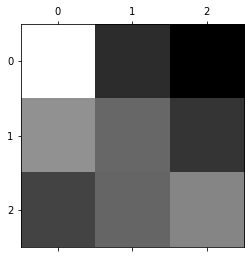

<Figure size 432x288 with 0 Axes>

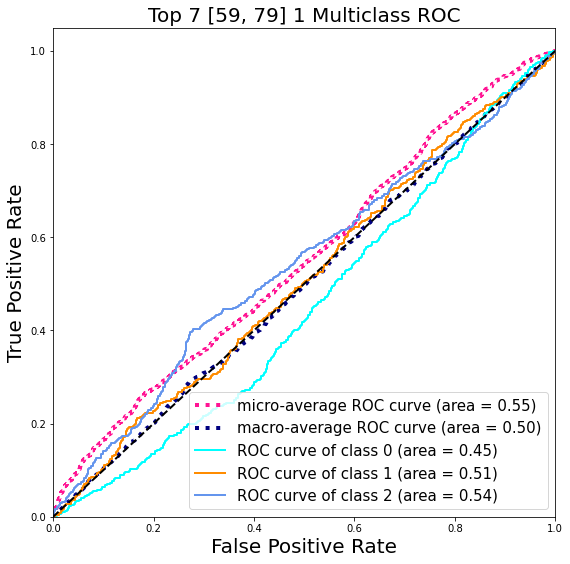

One-vs-One ROC AUC scores:
0.550806 (macro),
0.550806 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.550806 (macro),
0.550806 (weighted by prevalence)
after augmentation
2018 2018 2018
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5423


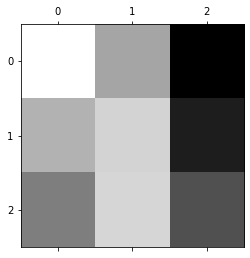

<Figure size 432x288 with 0 Axes>

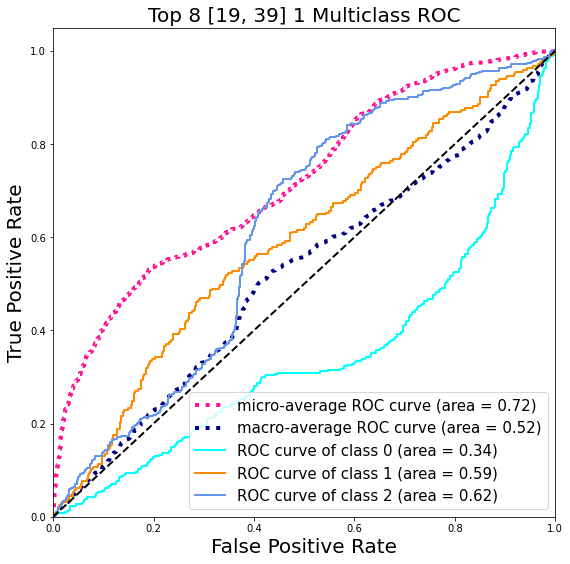

One-vs-One ROC AUC scores:
0.718294 (macro),
0.718294 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.718294 (macro),
0.718294 (weighted by prevalence)
after augmentation
2534 2534 2534
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4914


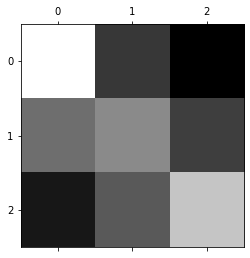

<Figure size 432x288 with 0 Axes>

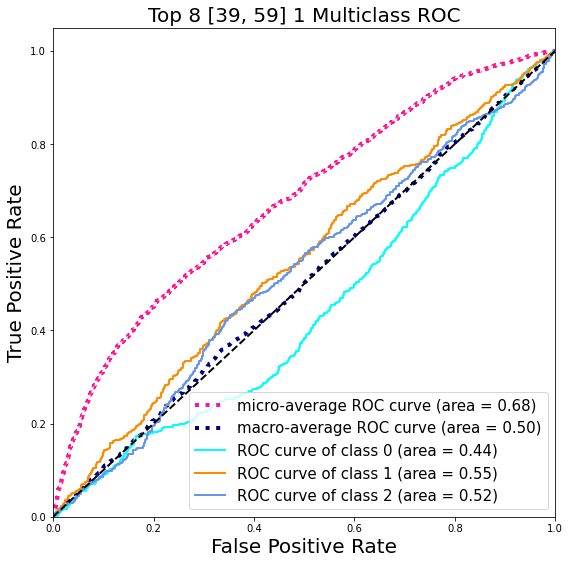

One-vs-One ROC AUC scores:
0.676085 (macro),
0.676085 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.676085 (macro),
0.676085 (weighted by prevalence)
after augmentation
2088 2088 2088
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4192


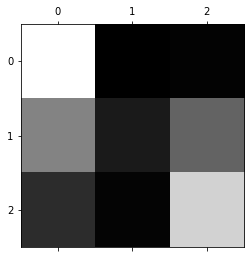

<Figure size 432x288 with 0 Axes>

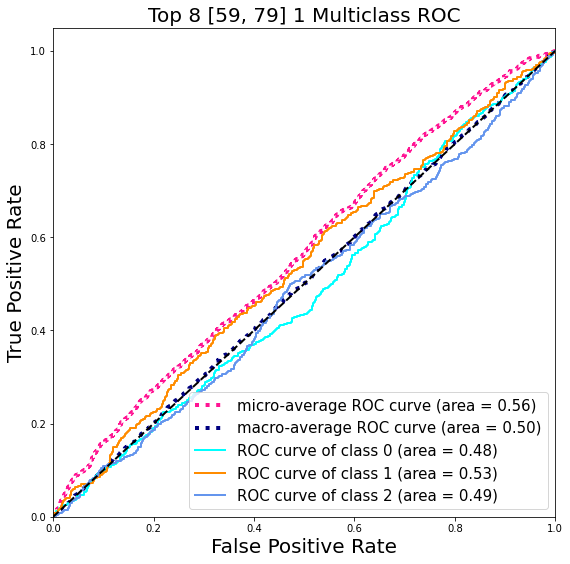

One-vs-One ROC AUC scores:
0.562200 (macro),
0.562200 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.562200 (macro),
0.562200 (weighted by prevalence)


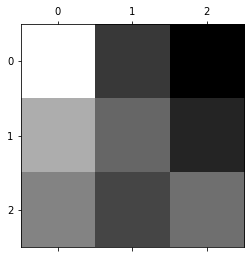

In [5]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
sup = "_micro_SMOTE"
PATH = "Multiclass_SGD_Result_no_gender" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1]:#,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [0]
            # sex = [ii]
            # data_copy = data_copy.loc[gender.isin(sex)]
            # data2_copy = data2_copy.loc[gender2.isin(sex)]
            # data3_copy = data3_copy.loc[gender3.isin(sex)]
            # data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling_No_gender.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)

            BMI_tmp = df['HE_BMI']
            for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]

                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                n_classes = 3 #고정
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # cnt_dict = dict(Counter(y_train['BMI_grade']))
                # cnt0 = cnt_dict[0]
                # cnt1 = cnt_dict[1]
                # cnt2 = cnt_dict[2]
                # print(cnt0, cnt1, cnt2)

                # #######################
                # ###### MANUALLY #######
                # #######################
                                
                # cnt_max = max(cnt0,cnt1,cnt2)
                # train_ = pd.concat([X_train, y_train], axis=1)
                
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['BMI_grade']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['BMI_grade']==2)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-1]
                # y_train = train_.iloc[:,-1:]

                ###############
                ### SMOTE #####
                ###############
                sm = SMOTE(random_state=12)#, ratio = 1.0)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                # print('after augmentation')
                # print(cnt0, cnt1, cnt2)
                # print('------------------')
                
                
                cnt_dict = dict(Counter(y_train['BMI_grade']))
                cnt0 = cnt_dict[0]
                cnt1 = cnt_dict[1]
                cnt2 = cnt_dict[2]
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')                    
                ##########################################################
                # from sklearn.multiclass import OneVsRestClassifier
                from sklearn.multiclass import OneVsOneClassifier
                # clf = OneVsRestClassifier(SGDClassifier())
                clf = OneVsOneClassifier(SGDClassifier())
                parameters = { "estimator__penalty" : ["l2", "l1"],
                              "estimator__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
                ##################GRID SEARCH CV
                # parameters = {'gamma':[0.01, 0.1,0.5,1,5,10,30,50],
                #             'C':[0.01, 0.1,0.5,1,5,10,30,50]}
                grid_dtree = GridSearchCV(clf,param_grid=parameters,cv=3,refit=True)
                grid_dtree.fit(X_train,y_train)

                print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
                print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

                fig = plt.figure(2*i)
                best_param = list(grid_dtree.best_params_.values())

                # clf = OneVsRestClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
                clf = OneVsOneClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
            
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'micro')
                p_score = precision_score(y_test, y_pred, average = 'micro')
                f_score = f1_score(y_test, y_pred, average = 'micro')
                accuracy = clf.score(X_test,y_test)#, average = None)
                # TP = perf_measure(np.array(y_test), y_pred)[0]
                # FP = perf_measure(np.array(y_test), y_pred)[1]
                # TN = perf_measure(np.array(y_test), y_pred)[2]
                # FN = perf_measure(np.array(y_test), y_pred)[3]
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                y_test = label_binarize(y_test, classes=[0, 1, 2]) # SVC input이 one hot incoding으로 안들어감.
                
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.decision_function(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.decision_function(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                lw = 2
                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE' + sup + '.png')
                plt.show()
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel())
                conf_mx = confusion_matrix(y_train.values.ravel(), y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                # y_prob = clf.predict_proba(X_test).ravel()/
                y_prob = clf.decision_function(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' SGD_혈액검사 데이터' + sup + '.csv', index=False)

No gender, 194979

after augmentation
3297 3297 3297
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5184


<Figure size 432x288 with 0 Axes>

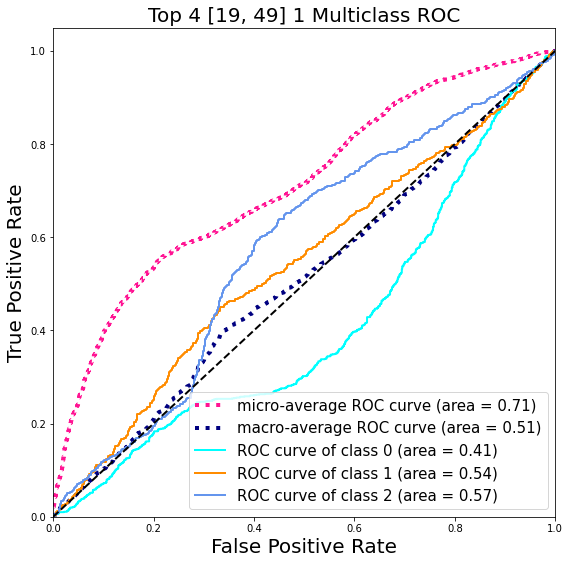

One-vs-One ROC AUC scores:
0.709069 (macro),
0.709069 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.709069 (macro),
0.709069 (weighted by prevalence)
after augmentation
3345 3345 3345
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4365


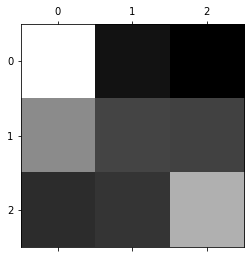

<Figure size 432x288 with 0 Axes>

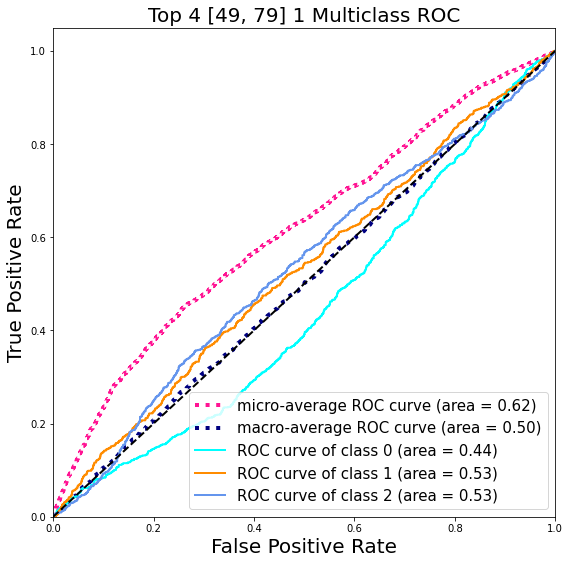

One-vs-One ROC AUC scores:
0.615795 (macro),
0.615795 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.615795 (macro),
0.615795 (weighted by prevalence)
after augmentation
3314 3314 3314
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5268


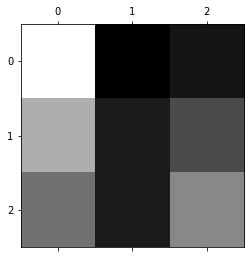

<Figure size 432x288 with 0 Axes>

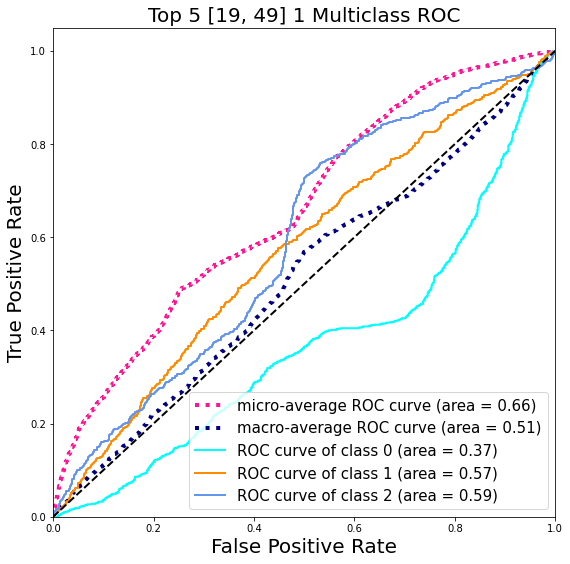

One-vs-One ROC AUC scores:
0.659242 (macro),
0.659242 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.659242 (macro),
0.659242 (weighted by prevalence)
after augmentation
3345 3345 3345
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4221


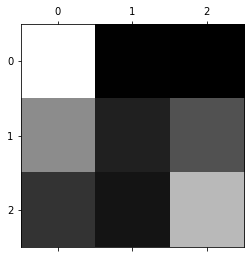

<Figure size 432x288 with 0 Axes>

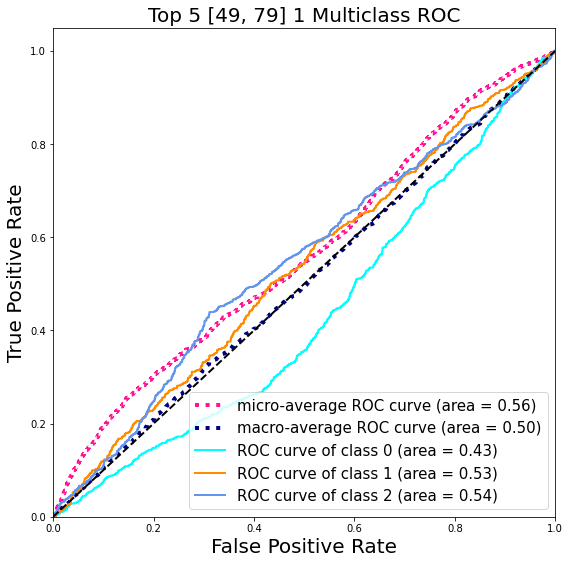

One-vs-One ROC AUC scores:
0.561701 (macro),
0.561701 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.561701 (macro),
0.561701 (weighted by prevalence)
after augmentation
3283 3283 3283
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5268


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


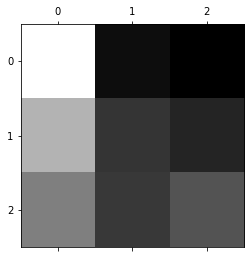

<Figure size 432x288 with 0 Axes>

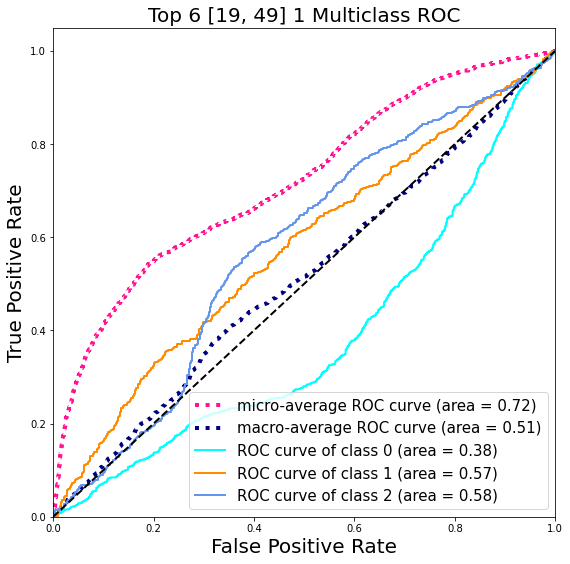

One-vs-One ROC AUC scores:
0.718652 (macro),
0.718652 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.718652 (macro),
0.718652 (weighted by prevalence)
after augmentation
3330 3330 3330
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4376


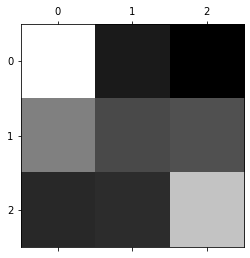

<Figure size 432x288 with 0 Axes>

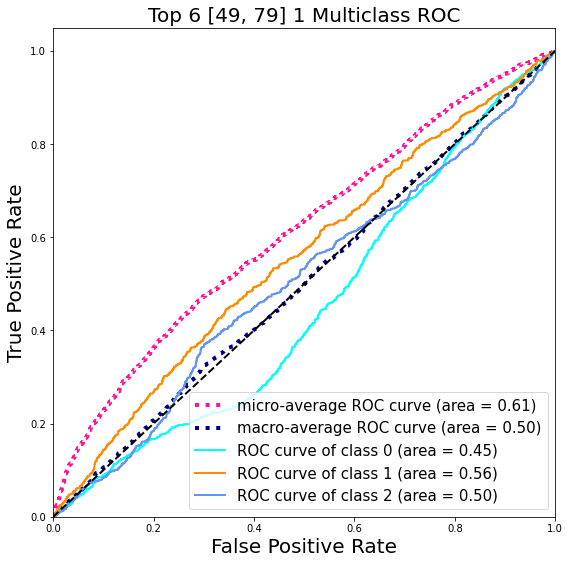

One-vs-One ROC AUC scores:
0.612584 (macro),
0.612584 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.612584 (macro),
0.612584 (weighted by prevalence)
after augmentation
3286 3286 3286
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5428


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


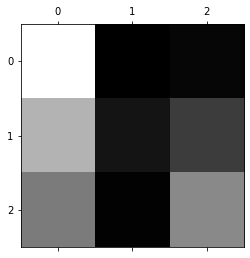

<Figure size 432x288 with 0 Axes>

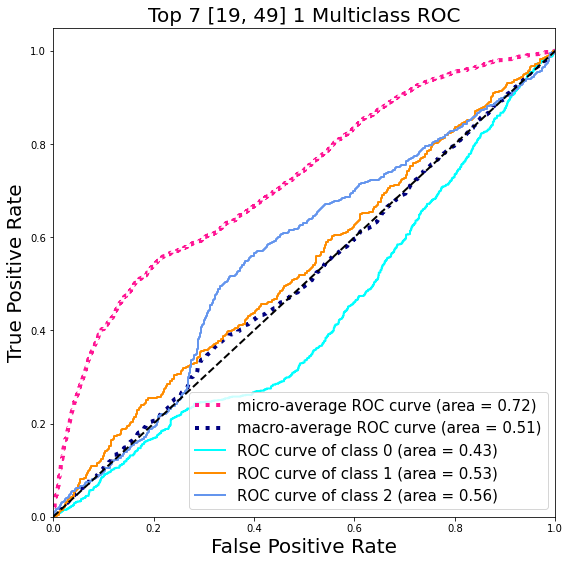

One-vs-One ROC AUC scores:
0.719163 (macro),
0.719163 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.719163 (macro),
0.719163 (weighted by prevalence)
after augmentation
3330 3330 3330
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.0001, 'estimator__penalty': 'l2'}
GridSearchCV 최고 정확도: 0.4405


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


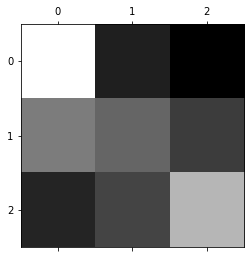

<Figure size 432x288 with 0 Axes>

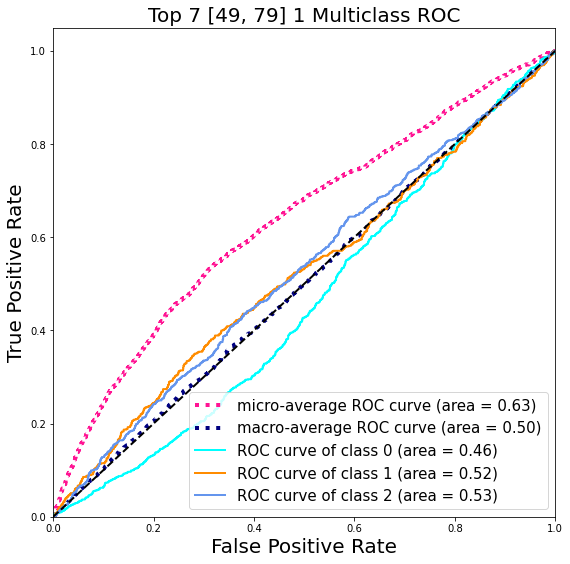

One-vs-One ROC AUC scores:
0.634240 (macro),
0.634240 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.634240 (macro),
0.634240 (weighted by prevalence)
after augmentation
3286 3286 3286
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.5347


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


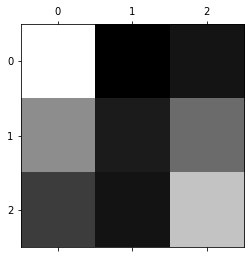

<Figure size 432x288 with 0 Axes>

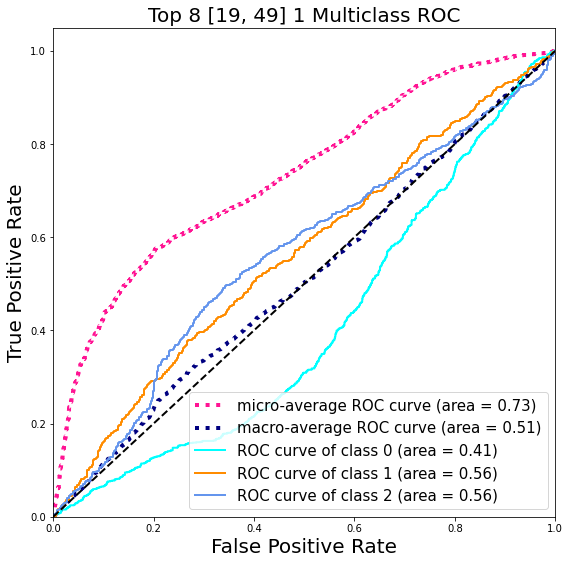

One-vs-One ROC AUC scores:
0.731725 (macro),
0.731725 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.731725 (macro),
0.731725 (weighted by prevalence)
after augmentation
3322 3322 3322
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

GridSearchCV 최적 파라미터: {'estimator__alpha': 0.001, 'estimator__penalty': 'l1'}
GridSearchCV 최고 정확도: 0.4421


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


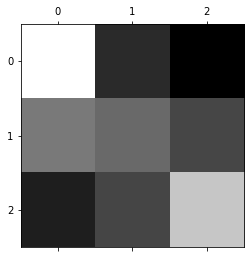

<Figure size 432x288 with 0 Axes>

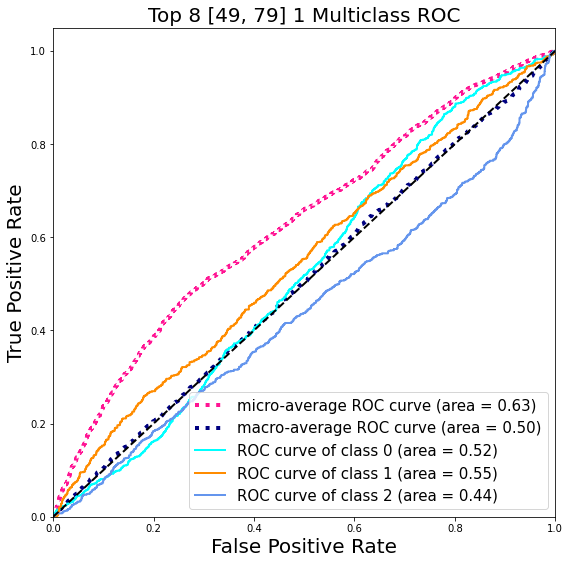

One-vs-One ROC AUC scores:
0.626930 (macro),
0.626930 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.626930 (macro),
0.626930 (weighted by prevalence)


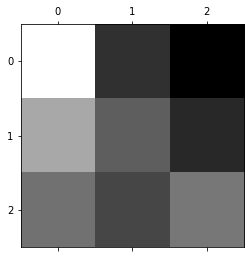

In [8]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
sup = "_micro_SMOTE"
PATH = "Multiclass_SGD_Result_no_gender_194979" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1]:#,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 49], [49, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [0]
            # sex = [ii]
            # data_copy = data_copy.loc[gender.isin(sex)]
            # data2_copy = data2_copy.loc[gender2.isin(sex)]
            # data3_copy = data3_copy.loc[gender3.isin(sex)]
            # data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling_194979.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)

            BMI_tmp = df['HE_BMI']
            for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]

                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                n_classes = 3 #고정
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # cnt_dict = dict(Counter(y_train['BMI_grade']))
                # cnt0 = cnt_dict[0]
                # cnt1 = cnt_dict[1]
                # cnt2 = cnt_dict[2]
                # print(cnt0, cnt1, cnt2)

                # #######################
                # ###### MANUALLY #######
                # #######################
                                
                # cnt_max = max(cnt0,cnt1,cnt2)
                # train_ = pd.concat([X_train, y_train], axis=1)
                
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['BMI_grade']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['BMI_grade']==2)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-1]
                # y_train = train_.iloc[:,-1:]

                ###############
                ### SMOTE #####
                ###############
                sm = SMOTE(random_state=12)#, ratio = 1.0)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                # print('after augmentation')
                # print(cnt0, cnt1, cnt2)
                # print('------------------')
                
                
                cnt_dict = dict(Counter(y_train['BMI_grade']))
                cnt0 = cnt_dict[0]
                cnt1 = cnt_dict[1]
                cnt2 = cnt_dict[2]
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')                    
                ##########################################################
                # from sklearn.multiclass import OneVsRestClassifier
                from sklearn.multiclass import OneVsOneClassifier
                # clf = OneVsRestClassifier(SGDClassifier())
                clf = OneVsOneClassifier(SGDClassifier())
                parameters = { "estimator__penalty" : ["l2", "l1"],
                              "estimator__alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
                ##################GRID SEARCH CV
                # parameters = {'gamma':[0.01, 0.1,0.5,1,5,10,30,50],
                #             'C':[0.01, 0.1,0.5,1,5,10,30,50]}
                grid_dtree = GridSearchCV(clf,param_grid=parameters,cv=3,refit=True)
                grid_dtree.fit(X_train,y_train)

                print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
                print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

                fig = plt.figure(2*i)
                best_param = list(grid_dtree.best_params_.values())

                # clf = OneVsRestClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
                clf = OneVsOneClassifier(SGDClassifier(penalty = best_param[1], alpha = best_param[0],max_iter=1000, random_state=42))
            
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'micro')
                p_score = precision_score(y_test, y_pred, average = 'micro')
                f_score = f1_score(y_test, y_pred, average = 'micro')
                accuracy = clf.score(X_test,y_test)#, average = None)
                # TP = perf_measure(np.array(y_test), y_pred)[0]
                # FP = perf_measure(np.array(y_test), y_pred)[1]
                # TN = perf_measure(np.array(y_test), y_pred)[2]
                # FN = perf_measure(np.array(y_test), y_pred)[3]
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                y_test = label_binarize(y_test, classes=[0, 1, 2]) # SVC input이 one hot incoding으로 안들어감.
                
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.decision_function(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.decision_function(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                lw = 2
                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE' + sup + '.png')
                plt.show()
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train.values.ravel())
                conf_mx = confusion_matrix(y_train.values.ravel(), y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                # y_prob = clf.predict_proba(X_test).ravel()/
                y_prob = clf.decision_function(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' SGD_혈액검사 데이터' + sup + '.csv', index=False)